# Import Library & Data

In [4]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [2]:
# pip install pandas==1.3.6

In [3]:
# pip install factor-analyzer


     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     ------------------------------------ - 41.0/42.8 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 346.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=70669cc4ee7102fec6367ba3ee404c938304c8ec359e5e2cf95e835d01c8e249
  Stored in directory: c:\users\shrey\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer
Note: you may need to restart

In [5]:
df= pd.read_csv(r"D:\Shreya user\Downloads\customer_survey_data.csv")

In [6]:
df.columns

Index(['Customer_Satisfaction', 'Product_Quality', 'Customer_Service',
       'Price_Affordability', 'Brand_Trust', 'Recommend_To_Friends'],
      dtype='object')

In [7]:
df.head()

,Customer_Satisfaction,Product_Quality,Customer_Service,Price_Affordability,Brand_Trust,Recommend_To_Friends
0,4,4,4,4,4,0
1,5,1,4,2,3,1
2,3,5,4,4,2,0
3,5,3,4,3,1,1
4,5,3,5,1,5,0


In [8]:
df.tail()

,Customer_Satisfaction,Product_Quality,Customer_Service,Price_Affordability,Brand_Trust,Recommend_To_Friends
495,1,2,4,1,2,1
496,3,1,5,5,3,0
497,1,1,5,1,2,0
498,1,4,4,5,3,0
499,1,3,4,3,5,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_Satisfaction  500 non-null    int64
 1   Product_Quality        500 non-null    int64
 2   Customer_Service       500 non-null    int64
 3   Price_Affordability    500 non-null    int64
 4   Brand_Trust            500 non-null    int64
 5   Recommend_To_Friends   500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [10]:
# Dropping missing values rows
df.dropna(inplace=True)  # we drop because missing data cannot correlation matrix

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_Satisfaction  500 non-null    int64
 1   Product_Quality        500 non-null    int64
 2   Customer_Service       500 non-null    int64
 3   Price_Affordability    500 non-null    int64
 4   Brand_Trust            500 non-null    int64
 5   Recommend_To_Friends   500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [12]:
df.columns

Index(['Customer_Satisfaction', 'Product_Quality', 'Customer_Service',
       'Price_Affordability', 'Brand_Trust', 'Recommend_To_Friends'],
      dtype='object')

<Axes: >

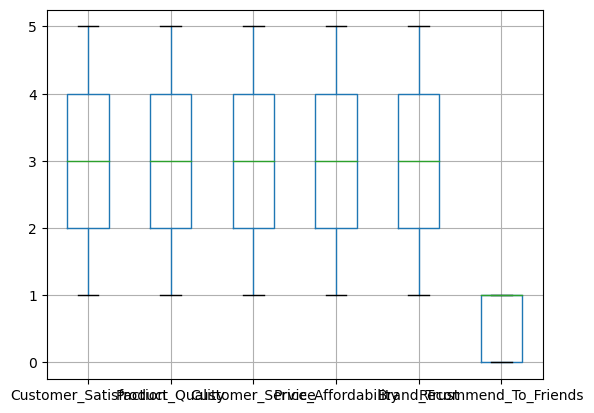

In [14]:
df.boxplot(column=['Customer_Satisfaction', 'Product_Quality', 'Customer_Service',
       'Price_Affordability', 'Brand_Trust', 'Recommend_To_Friends'])

In [14]:
# del df['Proline']

In [15]:
df.head()

,Customer_Satisfaction,Product_Quality,Customer_Service,Price_Affordability,Brand_Trust,Recommend_To_Friends
0,4,4,4,4,4,0
1,5,1,4,2,3,1
2,3,5,4,4,2,0
3,5,3,4,3,1,1
4,5,3,5,1,5,0


# Bartlett Test

* Ho: Correlation matrix is an identity matrix
  *   v/s
* H1:Correlation matrix is not an identity matrix

In [16]:
Correlation = df.corr()
Correlation.style.applymap(lambda x: 'background-color : skyblue' if x >= 0.7 else '')

C:\Users\shrey\AppData\Local\Temp\ipykernel_13784\1573199226.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Correlation.style.applymap(lambda x: 'background-color : skyblue' if x >= 0.7 else '')


,Customer_Satisfaction,Product_Quality,Customer_Service,Price_Affordability,Brand_Trust,Recommend_To_Friends
Customer_Satisfaction,1.000000,0.016160,0.006187,-0.013835,-0.029264,0.056025
Product_Quality,0.016160,1.000000,-0.061955,-0.033354,-0.084803,-0.022352
Customer_Service,0.006187,-0.061955,1.000000,-0.020547,0.031325,0.029560
Price_Affordability,-0.013835,-0.033354,-0.020547,1.000000,0.078330,0.018289
Brand_Trust,-0.029264,-0.084803,0.031325,0.078330,1.000000,0.002007
Recommend_To_Friends,0.056025,-0.022352,0.029560,0.018289,0.002007,1.000000


In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value  ## alpha = 0.05

(12.550684900113993, 0.6369587919887623)

# Kaiser-Meyer-Olkin (KMO) Test

* measures the suitability of data for factor analysis.
* It determines the adequacy for each observed variable and for the complete model.
* KMO estimates the proportion of variance among all the observed variable.
* KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.5197062003663986

The overall KMO for our data is 0.51

# Choosing the Number of Factors

* For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [19]:
#Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax',method="principal")
fa.fit(df)
# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([1.15722406, 1.07078824, 1.02153786, 0.93625176, 0.91803997,
       0.8961581 ])

In [24]:
dd=pd.DataFrame(eigen_values,columns=["Eigen_Values"])
dd['Factor'] = [1,2,3,4,5,6]
dd.head()

,Eigen_Values,Factor
0,1.157224,1
1,1.070788,2
2,1.021538,3
3,0.936252,4
4,0.918040,5


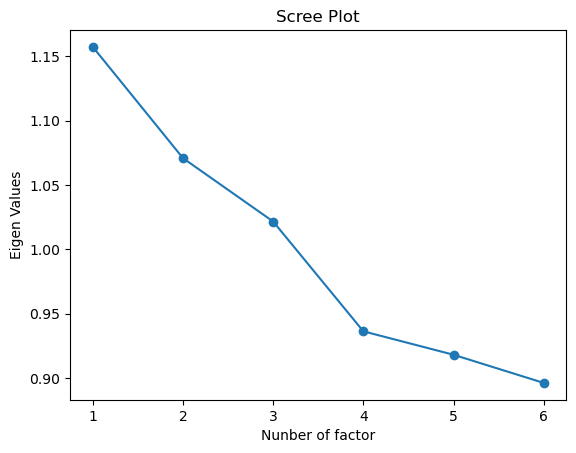

In [25]:
import matplotlib.pyplot as plt

plt.plot( 'Factor', 'Eigen_Values', data=dd, linestyle='-', marker='o')
plt.xlabel("Nunber of factor")
plt.ylabel("Eigen Values")
plt.title("Scree Plot")
plt.show()


# Performing Factor Analysis


In [26]:
# Create factor analysis object and perform factor analysis
aa=FactorAnalyzer(n_factors=3,rotation='varimax',method="principal")

In [27]:
model=aa.fit(df)

# Correlation Matrix

In [28]:
data_loading=df.columns.to_list()
data_loading

['Customer_Satisfaction',
 'Product_Quality',
 'Customer_Service',
 'Price_Affordability',
 'Brand_Trust',
 'Recommend_To_Friends']

In [29]:
Correlation=pd.DataFrame(model.corr_,index=data_loading,columns=data_loading)
#round(Correlation,3)
Correlation.style.applymap(lambda x: 'background-color : cyan' if x >= 0.7 else '')

C:\Users\shrey\AppData\Local\Temp\ipykernel_13784\2766881903.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Correlation.style.applymap(lambda x: 'background-color : cyan' if x >= 0.7 else '')


,Customer_Satisfaction,Product_Quality,Customer_Service,Price_Affordability,Brand_Trust,Recommend_To_Friends
Customer_Satisfaction,1.000000,0.016160,0.006187,-0.013835,-0.029264,0.056025
Product_Quality,0.016160,1.000000,-0.061955,-0.033354,-0.084803,-0.022352
Customer_Service,0.006187,-0.061955,1.000000,-0.020547,0.031325,0.029560
Price_Affordability,-0.013835,-0.033354,-0.020547,1.000000,0.078330,0.018289
Brand_Trust,-0.029264,-0.084803,0.031325,0.078330,1.000000,0.002007
Recommend_To_Friends,0.056025,-0.022352,0.029560,0.018289,0.002007,1.000000


# Factor Loading Matrix

* value in matix is called loading

In [30]:
factor=["Factor1 (Z1) ","Factor2 (Z2)","Factor3 (Z3)"]  # array

In [31]:
loading=pd.DataFrame(model.loadings_,columns=factor,index=data_loading)
loading=loading.abs()
loading.style.applymap(lambda x: 'background-color : skyblue' if x > 0.5 else '')

C:\Users\shrey\AppData\Local\Temp\ipykernel_13784\3718995887.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  loading.style.applymap(lambda x: 'background-color : skyblue' if x > 0.5 else '')


,Factor1 (Z1),Factor2 (Z2),Factor3 (Z3)
Customer_Satisfaction,0.116358,0.713886,0.083843
Product_Quality,0.289623,0.025302,0.600552
Customer_Service,0.217588,0.074777,0.757506
Price_Affordability,0.766802,0.100540,0.198144
Brand_Trust,0.596636,0.115393,0.303253
Recommend_To_Friends,0.115989,0.721536,0.121401


# Eigen values

In [32]:
header=["Eigen_Value","Perentage of Variance Explained","Cumulative Perentage of Variance Explained"]

In [33]:
variance_Explained=pd.DataFrame(model.get_factor_variance(),columns=factor,index=header)
variance_Explained

,Factor1 (Z1),Factor2 (Z2),Factor3 (Z3)
Eigen_Value,1.102178,1.059904,1.087468
Perentage of Variance Explained,0.183696,0.176651,0.181245
Cumulative Perentage of Variance Explained,0.183696,0.360347,0.541592


# Communalities & Uniqueness

In [34]:
communalities=pd.DataFrame(model.get_communalities(),columns=["communalities"],index=data_loading)
communalities ['uniqueness']= model.get_uniquenesses()
round(communalities,2)

,communalities,uniqueness
Customer_Satisfaction,0.53,0.47
Product_Quality,0.45,0.55
Customer_Service,0.63,0.37
Price_Affordability,0.64,0.36
Brand_Trust,0.46,0.54
Recommend_To_Friends,0.55,0.45


# Final Transform data


In [35]:
df.head()

,Customer_Satisfaction,Product_Quality,Customer_Service,Price_Affordability,Brand_Trust,Recommend_To_Friends
0,4,4,4,4,4,0
1,5,1,4,2,3,1
2,3,5,4,4,2,0
3,5,3,4,3,1,1
4,5,3,5,1,5,0


In [36]:
output=pd.DataFrame(model.fit_transform(df),columns=['Data Factor1','Data Factor2','Data Factor3'])
output

,Data Factor1,Data Factor2,Data Factor3
0,0.327162,-0.164031,-0.003965
1,-0.406912,1.536443,1.396638
2,-0.509505,-0.469664,-0.674232
3,-0.968787,1.798893,0.137017
4,-0.872435,0.027576,1.457256
...,...,...,...
495,-1.180324,-0.337127,1.230473
496,0.841613,-0.504953,1.335538
497,-1.401663,-1.680485,1.904839
498,0.651582,-1.432303,-0.168168


In [37]:
print("original shape:   ", df.shape)
print("transformed shape:", output.shape)

original shape:    (500, 6)
transformed shape: (500, 3)


# To check the Factor Component is uncorrelated / independent

In [38]:
round(output.corr(),5)

,Data Factor1,Data Factor2,Data Factor3
Data Factor1,1.0,-0.0,0.0
Data Factor2,-0.0,1.0,0.0
Data Factor3,0.0,0.0,1.0


The correlation between Data Factor 1 and Data Factor 2 is -0.0 as shown in the table. This indicates there is no significant linear relationship between these two factors.